In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
import os
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
from keras.utils import to_categorical
import imageio # To read images
from PIL import Image # For image resizing 
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("/kaggle/input/cat-dog-images-for-classification/cat_dog.csv")
df.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   25000 non-null  object
 1   labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


**Displaying Sample Image**

(352, 349, 3)


/tmp/ipykernel_42/115214330.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("/kaggle/input/cat-dog-images-for-classification/cat_dog/cat.12461.jpg")


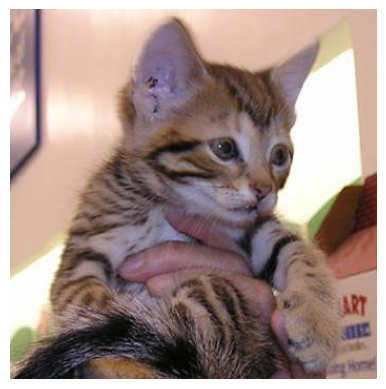

In [17]:
img = imageio.imread("/kaggle/input/cat-dog-images-for-classification/cat_dog/cat.12461.jpg")
plt.imshow(img)
print(img.shape)
plt.axis('off')
plt.show()

**Splitting dataset into train and test data**

In [18]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

**Visualizing datasets**

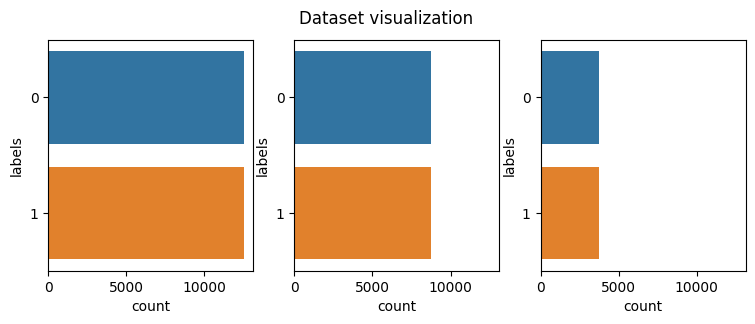

In [19]:
fig, ax = plt.subplots(ncols=3, sharex=True, figsize=(9, 3))
sns.countplot(y='labels', data=df, ax=ax[0])
sns.countplot(y='labels', data=train_df, ax=ax[1])
sns.countplot(y='labels', data=test_df, ax=ax[2])
fig.suptitle('Dataset visualization')
plt.show()


**Reshaping all images to the same size of 32*32**

In [20]:
temp = []
for img_name in train_df.image:
    img_path = os.path.join("../input/cat-dog-images-for-classification/cat_dog", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
train_x = np.stack(temp)

/tmp/ipykernel_42/3681036455.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [21]:
temp = []
for img_name in test_df.image:
    img_path = os.path.join("../input/cat-dog-images-for-classification/cat_dog", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
test_x = np.stack(temp)

/tmp/ipykernel_42/1648205751.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [28]:
train_x = train_x / 255.
test_x = test_x / 255.
train_y = lb.fit_transform(train_df.labels)
train_y = to_categorical(train_y)


In [31]:
test_y = lb.fit_transform(test_df.labels)
test_y = to_categorical(test_y)


In [32]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 2
epochs = 5
batch_size = 128

In [33]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 1537502 (5.87 MB)
Trainable params: 1537502 (5.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compiling and Training Network**

In [35]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
137/137 [==============================] - 2s 11ms/step - loss: 0.6932 - accuracy: 0.4973
Epoch 2/5
137/137 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 3/5
137/137 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 4/5
137/137 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 5/5
137/137 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.4959


In [37]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/5
110/110 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 2/5
110/110 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 3/5
110/110 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 4/5
110/110 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 5/5
110/110 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5049


**Visualizing model prediction with sample data**

/tmp/ipykernel_42/3313421701.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join("../input/cat-dog-images-for-classification/cat_dog", str(img_name)))


235/235 [==============================] - 1s 3ms/step
Original: 0 Predicted: 0


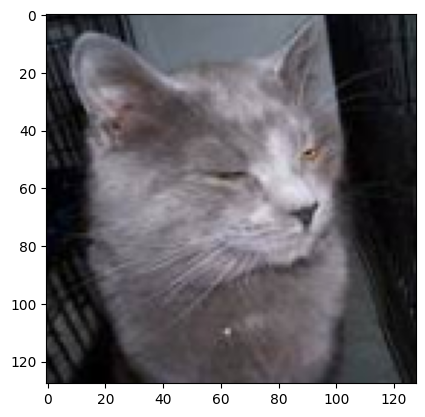

In [38]:
np.random.seed(10)
idx = np.random.choice(test_df.index)
img_name = test_df.image[idx]
img = imageio.imread(os.path.join("../input/cat-dog-images-for-classification/cat_dog", str(img_name)))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = np.argmax(model.predict(test_x), axis=-1)
print('Original:', test_df.labels[idx], 'Predicted:', pred[idx])